In [360]:
# Dependencies

import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [361]:
# Save path to data set in a variable
data_file = "combined_states_final.csv"

In [362]:
# Use Pandas to read data
data_file_pd = pd.read_csv(data_file)
data_file_pd.head()

,ID,Name,KilrType,NumVics,Kilcountry,Kilstate,Age1stKil,YearFirst,DecStart
0,367,"Eaton, Dale Wayne",Serial,6.0,USA-United States,WY,43.0,1988.0,1980
1,572,"Silveria, Robert Joseph",Serial,11.0,USA-United States,OR / WY / UT / AZ / KS / WA / FL,36.0,1989.0,1980
2,434,"Franklin, Joseph Paul",Serial,21.0,USA-United States,GA / IN / MO / OH / OK / PA / TN / UT / VA / W...,27.0,1977.0,1970
3,837,"Luther, Thomas Edward",Serial,3.0,USA-United States,VT / CO / WV / PA,25.0,1982.0,1980
4,1008,"Powers, Harry F.",Serial,5.0,USA-United States,WV,39.0,1931.0,1930


In [363]:
data_file_pd.dtypes

ID              int64
Name           object
KilrType       object
NumVics       float64
Kilcountry     object
Kilstate       object
Age1stKil     float64
YearFirst     float64
DecStart       object
dtype: object

In [364]:
# Count of Names prior to cleaning
data_file_pd.count()

ID            1862
Name          1862
KilrType      1862
NumVics       1860
Kilcountry    1862
Kilstate      1862
Age1stKil     1723
YearFirst     1833
DecStart      1739
dtype: int64

In [365]:
# Drop duplicate names

sk_clean_df = data_file_pd.drop_duplicates('Name').sort_index()


In [366]:
# Count of names after cleaning
sk_clean_df.count()

ID            1311
Name          1311
KilrType      1311
NumVics       1309
Kilcountry    1311
Kilstate      1311
Age1stKil     1213
YearFirst     1289
DecStart      1223
dtype: int64

In [367]:
# remove decimal points



In [368]:
# To sort from highest to lowest, ascending=False must be passed in
sk_clean_df = sk_clean_df.sort_values("NumVics", ascending=False)
sk_clean_df.head(20)

,ID,Name,KilrType,NumVics,Kilcountry,Kilstate,Age1stKil,YearFirst,DecStart
1559,1058,"Ridgway, Gary Leon",Serial,49.0,USA-United States,WA,33.0,1982.0,1980
1521,95,"Bird, Jake",Serial,44.0,USA-United States,WA,34.0,1935.0,1930
17,538,"Hall, Larry DeWayne",Serial,44.0,USA-United States,WI / IN / MI / IL / GA / VA,24.0,1987.0,1980
1537,411,"Gohl, William",Serial,41.0,USA-United States,WA,49.0,1909.0,1900
694,528,"Gunness, Belle",Serial,41.0,USA-United States,IL / IN,37.0,1900.0,1900
224,300,"Cullen, Charles",Serial,40.0,USA-United States,NJ / PA,28.0,1988.0,1980
329,604,"Harvey, Donald",Serial,37.0,USA-United States,OH / KY,18.0,1970.0,1970
144,2335,"Barnabet, Clementine",Serial,35.0,USA-United States,LA / TX,18.0,1911.0,1910
349,1215,"Swango, Michael Dr.",Serial,35.0,"USA-United States, ZWE-Zimbabwe",OH / NY / Zimbabwe,29.0,1984.0,1980
385,318,"Davis, Bruce Alan",Serial,33.0,USA-United States,IL / DC / NY / MD / MA / FL / NV / LA /...,21.0,1969.0,1960


In [369]:
# Reference multiple columns within a DataFrame
top_20_df = sk_clean_df[["Name", "NumVics", "Age1stKil"]].head(20)
top_20_df.head(20)

,Name,NumVics,Age1stKil
1559,"Ridgway, Gary Leon",49.0,33.0
1521,"Bird, Jake",44.0,34.0
17,"Hall, Larry DeWayne",44.0,24.0
1537,"Gohl, William",41.0,49.0
694,"Gunness, Belle",41.0,37.0
224,"Cullen, Charles",40.0,28.0
329,"Harvey, Donald",37.0,18.0
144,"Barnabet, Clementine",35.0,18.0
349,"Swango, Michael Dr.",35.0,29.0
385,"Davis, Bruce Alan",33.0,21.0


In [370]:
# new DataFrame that looks into a specific state
WA_df1 = sk_clean_df.loc[sk_clean_df["Kilstate"] == "WA"]
WA_df1.head()

,ID,Name,KilrType,NumVics,Kilcountry,Kilstate,Age1stKil,YearFirst,DecStart
1559,1058,"Ridgway, Gary Leon",Serial,49.0,USA-United States,WA,33.0,1982.0,1980
1521,95,"Bird, Jake",Serial,44.0,USA-United States,WA,34.0,1935.0,1930
1537,411,"Gohl, William",Serial,41.0,USA-United States,WA,49.0,1909.0,1900
1573,1375,"Yates, Robert Lee",Serial,22.0,USA-United States,WA,36.0,1975.0,1970
1554,884,"McFarlane, Michael",Serial,11.0,USA-United States,WA,20.0,1980.0,1980


In [371]:
# new DataFrame that looks into a specific state
CA_df1 = sk_clean_df.loc[sk_clean_df["Kilstate"] == "CA"]
CA_df1.head()

,ID,Name,KilrType,NumVics,Kilcountry,Kilstate,Age1stKil,YearFirst,DecStart
1037,745,"Kearney, Patrick Wayne",Serial,28.0,USA-United States,CA,25.0,1977.0,NaN
1041,783,"Kraft, Randy Steven",Serial,27.0,USA-United States,CA,26.0,1983.0,Arrest: was caught when he drove drunk on the ...
998,271,"Corona, Juan Vallejo",Serial,25.0,USA-United States,CA,36.0,1971.0,NaN
997,257,"Constanzo, Adolfo de Jesus",Serial,23.0,"USA-United States, MEX-Mexico",CA,24.0,1989.0,NaN
1042,789,"Lake, Leonard",Serial,22.0,USA-United States,CA,38.0,1985.0,1) Lake died by swallowing a cyanide \npill he...


In [372]:
# new DataFrame that looks into a specific state
OR_df1 = sk_clean_df.loc[sk_clean_df["Kilstate"] == "OR"]
OR_df1.head()

,ID,Name,KilrType,NumVics,Kilcountry,Kilstate,Age1stKil,YearFirst,DecStart
1496,705,"Jesperson, Keith Hunter",Serial,8.0,USA-United States,OR,34.0,1990.0,1990
1509,1370,"Wright, Douglas Franklin",Serial,7.0,USA-United States,OR,29.0,1969.0,1960
1502,1081,"Rogers, Dayton Leroy",Serial,7.0,USA-United States,OR,30.0,1983.0,1980
1501,1042,"Reed, Todd Alan",Serial,5.0,USA-United States,OR,32.0,1999.0,1990
1498,825,"Little, Dwain Lee",Serial,5.0,USA-United States,OR,16.0,1964.0,1960


In [373]:
# Create an array that contains the number of victims each killer has
victims = [49,44,44,41,41,40,37,35,35,33,33,31,29,28,27,27,27,26,25,24]
x_axis = np.arange(len(victims))

<IPython.core.display.Javascript object>


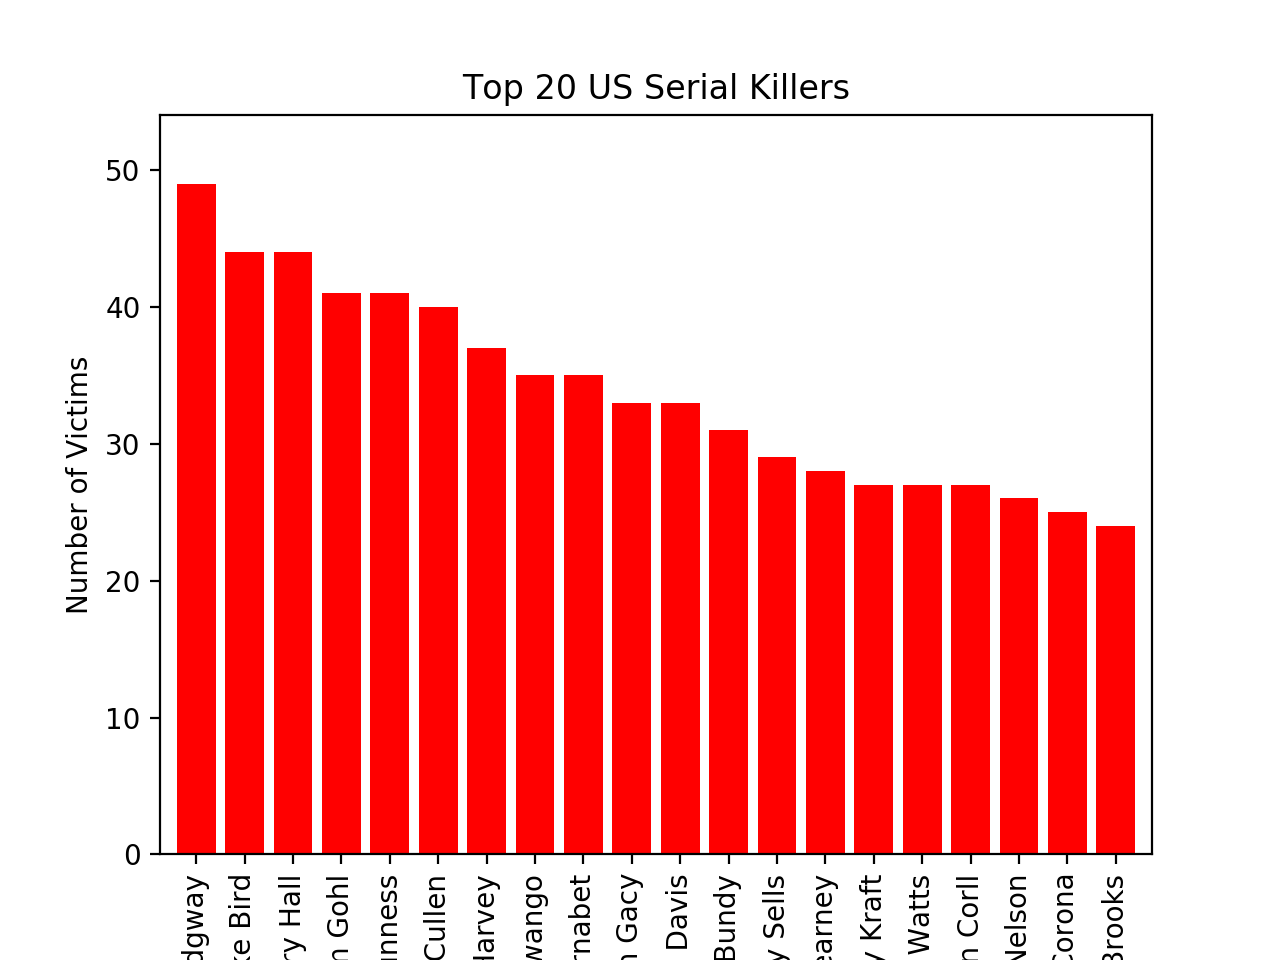

<Container object of 20 artists>

In [374]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, victims, color='#FF0000', alpha=1.0, align="center")



In [375]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Gary Ridgway", "Jake Bird", "Larry Hall", "William Gohl", "Belle Gunness", "Charles Cullen",
                            "Donald Harvey", "Michael Swango", "Clementine Barnabet", "John Gacy", "Bruce Davis",
                            "Ted Bundy", "Tommy Sells", "Patrick Kearney", "Randy Kraft", "Carl Watts", "Dean Corll",
                            "Earle Nelson", "Juan Corona", "David Brooks"], rotation="vertical")


([<matplotlib.axis.XTick at 0x121f95518>,
 <a list of 20 Text xticklabel objects>)

In [376]:
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 19.75)

In [377]:
# Sets the y limits of the current chart
plt.ylim(0, max(victims)+5)

(0, 54)

In [378]:
# Give our chart some labels a title and save images
plt.title("Top 20 US Serial Killers")
plt.xlabel("Serial Killer")
plt.ylabel("Number of Victims")
plt.savefig('Top_10_US_Serial_Killers.png', bbox_inches='tight')